In [1]:
import pandas as pd
import numpy as np
import os, sys

In [2]:
path = './results'
name_loci = 'ab_PC_best_all.csv'
name_tad = 'ab_PC_best_tad.csv'

## Accuracy of AB compartments at loci level

In [3]:
file = os.path.join(path, name_loci)
df = pd.read_csv(file) 
df

,Unnamed: 0,GIST,GIST_0,GIST_1,GIST_2,GIST_3,GIST_4,GIST_5,GIST_6,GIST_7,...,GIST_35,GIST_36,GIST_37,GIST_38,GIST_39,ShRec3D,LorDG,pastis,GEM,ChromSDE
0,22,0.745966,0.605821,0.658020,0.645049,0.527365,0.590952,0.576716,0.751028,0.538121,...,0.524518,0.529579,0.615628,0.683961,0.636507,0.730149,0.737425,0.529896,0.616577,0.573869
1,21,0.832402,0.805090,0.573557,0.884544,0.772502,0.612042,0.854128,0.735258,0.805090,...,0.505897,0.881440,0.573246,0.761949,0.783054,0.786468,0.722843,0.604904,0.555556,0.646493
2,20,0.746535,0.722453,0.646743,0.671864,0.819127,0.505371,0.769058,0.635482,0.774428,...,0.523216,0.758316,0.621275,0.758836,0.873008,0.795392,0.630804,0.515419,0.514900,0.537249


In [4]:
samples = ['Unnamed: 0', 'GIST','ShRec3D', 'LorDG', 'pastis', 'GEM', 'ChromSDE']
df_loci = df[samples].copy()
gists = [x for x in df.head() if 'GIST_' in x]
df_loci['GISTbest'] = df[gists[:]].max(axis=1)
df_loci = df_loci.rename({'Unnamed: 0': 'Chromosome'}, axis='columns')
df_loci = df_loci.rename({'GIST': 'GISTavg'}, axis='columns')
column_names = ['Chromosome', 'GISTavg', 'GISTbest', 'ShRec3D', 'LorDG', 'pastis', 'GEM', 'ChromSDE']
df_loci = df_loci.reindex(columns=column_names)
df_loci.to_csv(path_or_buf='/bigdata/wmalab/yhu/proj/notes/exp_GIST/results/select_'+name_loci, index=True)
df_loci

,Chromosome,GISTavg,GISTbest,ShRec3D,LorDG,pastis,GEM,ChromSDE
0,22,0.745966,0.829801,0.730149,0.737425,0.529896,0.616577,0.573869
1,21,0.832402,0.884544,0.786468,0.722843,0.604904,0.555556,0.646493
2,20,0.746535,0.873008,0.795392,0.630804,0.515419,0.514900,0.537249


## Accuracy of AB compartments at TAD level

In [5]:
file = os.path.join(path, name_tad)
print(file)
df = pd.read_csv(file) 
df

./results/ab_PC_best_tad.csv


,Unnamed: 0,GIST,GIST_0,GIST_1,GIST_2,GIST_3,GIST_4,GIST_5,GIST_6,GIST_7,...,GIST_35,GIST_36,GIST_37,GIST_38,GIST_39,ShRec3D,LorDG,pastis,GEM,ChromSDE
0,22,0.769231,0.576923,0.692308,0.538462,0.538462,0.500000,0.653846,0.884615,0.500000,...,0.538462,0.576923,0.730769,0.653846,0.730769,0.730769,0.769231,0.653846,0.653846,0.653846
1,21,0.818182,0.787879,0.545455,0.909091,0.878788,0.606061,0.909091,0.727273,0.818182,...,0.515152,0.939394,0.575758,0.727273,0.666667,0.757576,0.636364,0.606061,0.727273,0.696970
2,20,0.724138,0.620690,0.620690,0.689655,0.758621,0.586207,0.793103,0.620690,0.620690,...,0.517241,0.793103,0.586207,0.758621,0.896552,0.827586,0.620690,0.620690,0.620690,0.724138


In [6]:
samples = ['Unnamed: 0', 'GIST','ShRec3D', 'LorDG', 'pastis', 'GEM', 'ChromSDE']
df_tad = df[samples].copy()
gists = [x for x in df.head() if 'GIST_' in x]
df_tad['GISTbest'] = df[gists[:]].max(axis=1)
df_tad = df_tad.rename({'Unnamed: 0': 'Chromosome'}, axis='columns')
df_tad = df_tad.rename({'GIST': 'GISTavg'}, axis='columns')
column_names = ['Chromosome', 'GISTavg', 'GISTbest', 'ShRec3D', 'LorDG', 'pastis', 'GEM', 'ChromSDE']
df_tad = df_tad.reindex(columns=column_names)
df_tad.to_csv(path_or_buf='/bigdata/wmalab/yhu/proj/notes/exp_GIST/results/select_'+name_tad, index=True)
df_tad

,Chromosome,GISTavg,GISTbest,ShRec3D,LorDG,pastis,GEM,ChromSDE
0,22,0.769231,0.923077,0.730769,0.769231,0.653846,0.653846,0.653846
1,21,0.818182,0.939394,0.757576,0.636364,0.606061,0.727273,0.696970
2,20,0.724138,0.896552,0.827586,0.620690,0.620690,0.620690,0.724138


# Plot AB compartments

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})

methods = ['GISTavg', 'GISTbest', 'ShRec3D', 'LorDG', 'pastis', 'GEM', 'ChromSDE']
chromosomes = ['20', '21', '22']
ipc = [0, 1, 2]
gist_best = {'20':39, '21':36, '22':33}

pcs = np.load('./results/pc.npz', allow_pickle=True)
pcs_loci = pcs['loci'].item()
pcs_tad = pcs['tad'].item()

In [8]:
def plot_pc_tad(pc, ipc, key, chrom, figsize=(15, 0.7)):
    x = np.arange(len(pc) )
    fig, axs = plt.subplots(len(ipc),1, sharex=True, figsize=figsize)
    fig.suptitle('{} chr{} PC{}'.format(key, chrom, ipc))
    for i in ipc:
        cpc = pc[:,i]
        axs[i].bar(x[cpc > 0], cpc[cpc>0], color='red')
        axs[i].bar(x[cpc < 0], cpc[cpc<0], color='blue' )
        axs[i].set_yticks([0])

In [9]:
def plot_pc_loci(pc, ipc, key, chrom, figsize=(15, 0.7)):
    fig, axs = plt.subplots(len(ipc), 1, sharex=True, figsize=figsize)
    N = pc.shape[0]
    x = np.arange(N)
    fig.suptitle('{} chr{} PC{}'.format(key, chrom, ipc))
    for i, idpc in enumerate(ipc):
        y=(pc[:,idpc]).flatten()
        idx_t = y>0
        yt,yf = y.copy(),y.copy()
        yt[~idx_t], yf[idx_t] = 0, 0
        g = sns.lineplot(x=x, y=yt/yt.max(), ax=axs[i], color="red", linewidth=0.)
        axs[i].fill_between(x, yt/yt.max(), color="red", alpha=1.0)
        g = sns.lineplot(x=x, y=-yf/yf.min(), ax=axs[i],color="blue",linewidth=0.)
        axs[i].fill_between(x, -yf/yf.min(), color="blue", alpha=1.0)
        axs[i].set_yticks([0])

## Hi-C A/B compartments

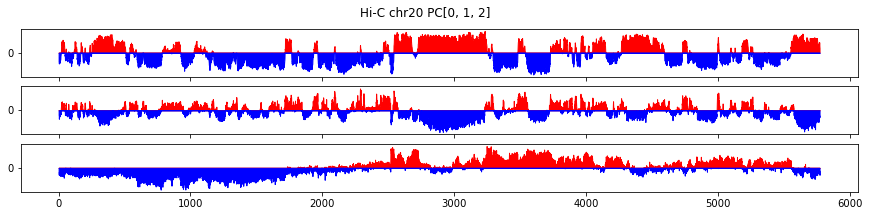

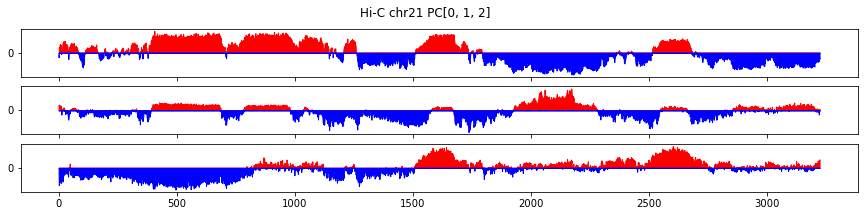

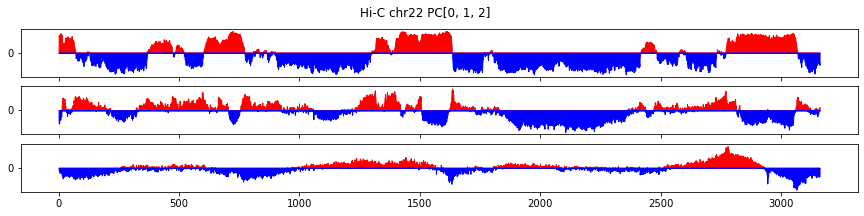

In [10]:
for chrom in chromosomes:
    plot_pc_loci(pcs_loci[chrom]['hic'], ipc, 'Hi-C', chrom, figsize=(15, 3))

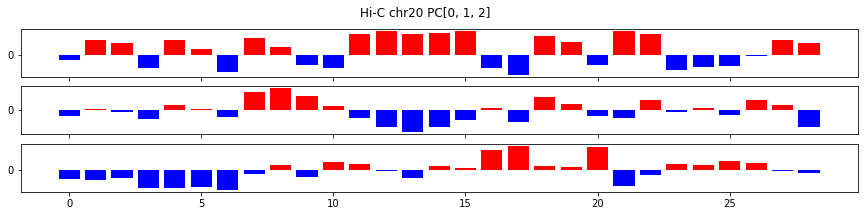

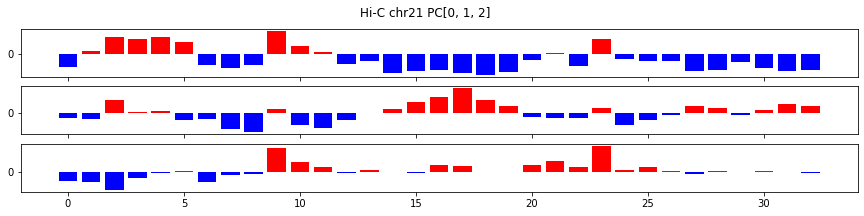

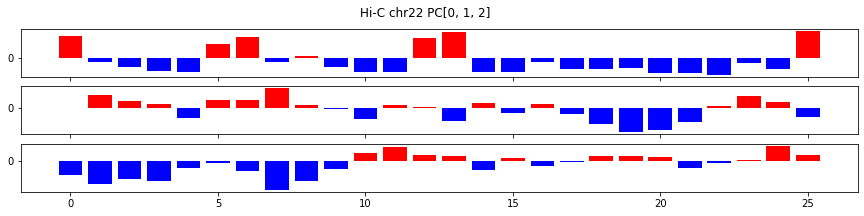

In [11]:
for chrom in chromosomes:
    plot_pc_tad(pcs_tad[chrom]['hic'], ipc, 'Hi-C', chrom, figsize=(15, 3))

## Loci level

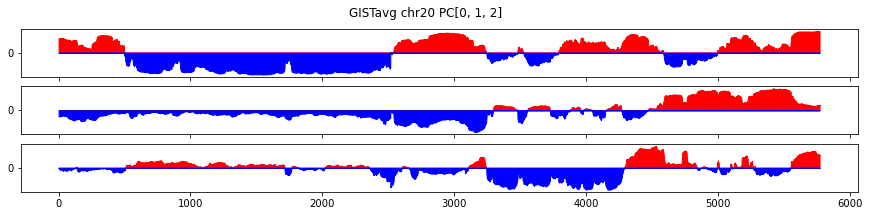

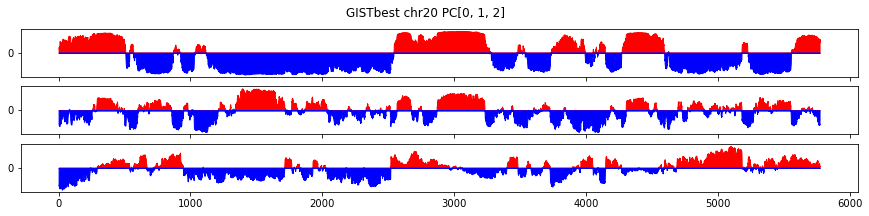

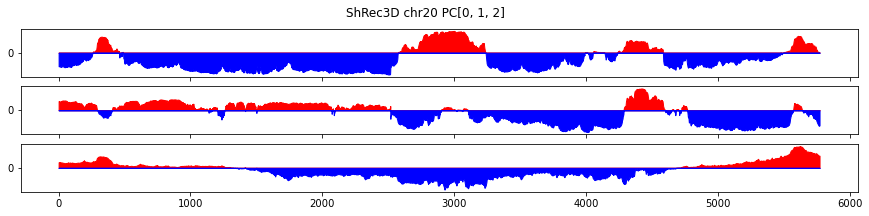

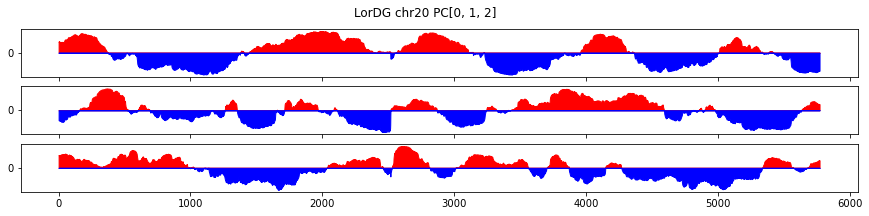

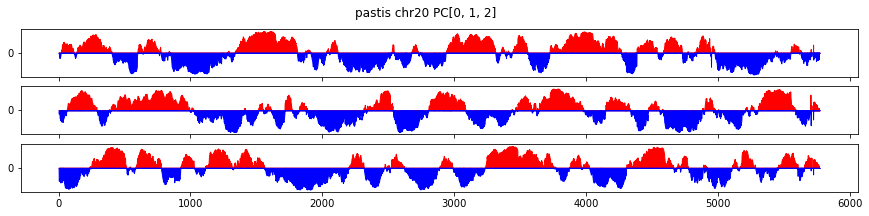

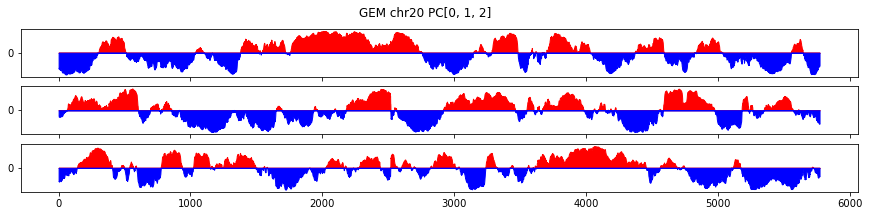

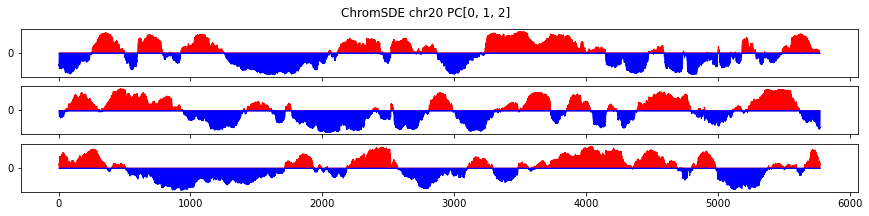

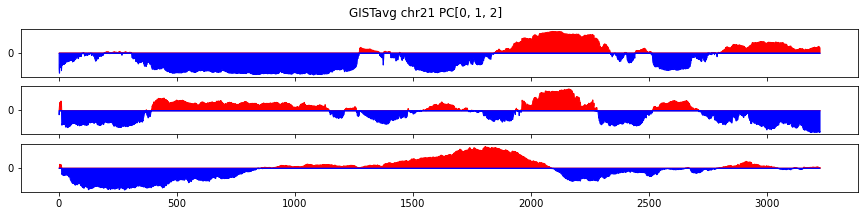

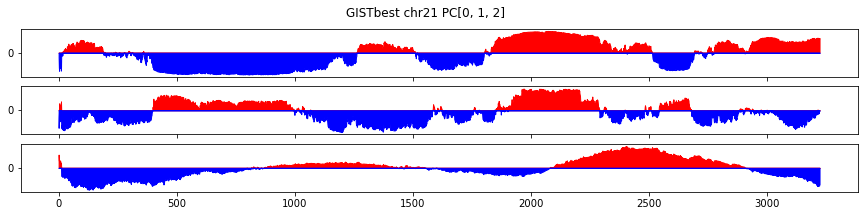

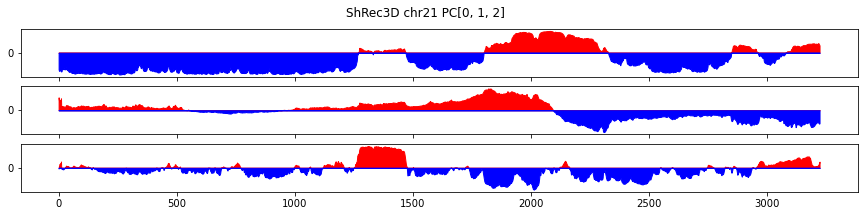

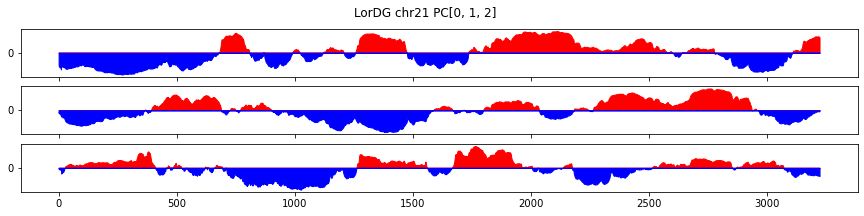

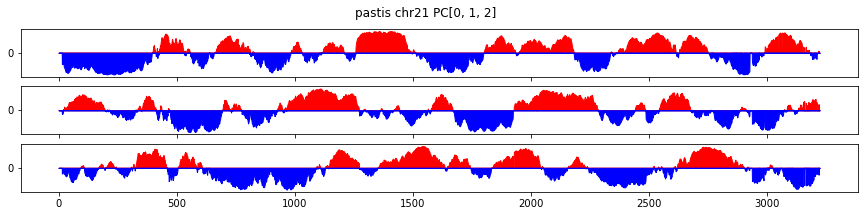

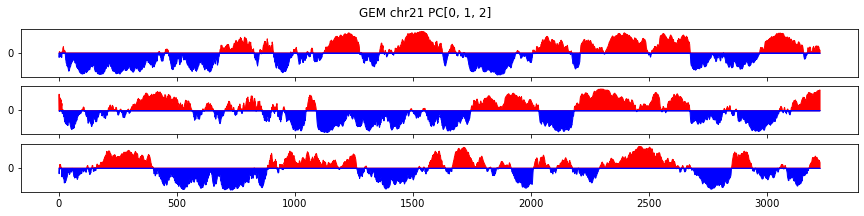

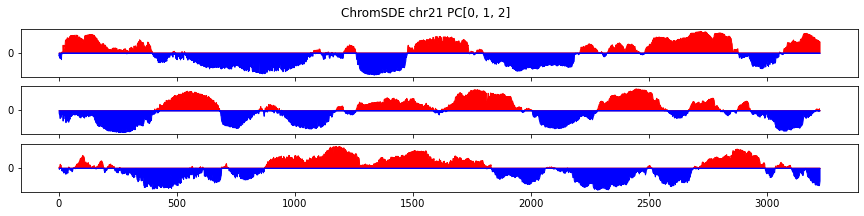

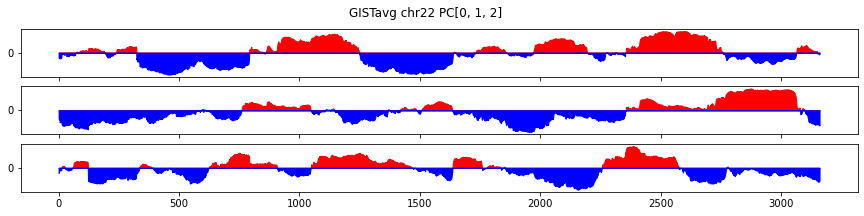

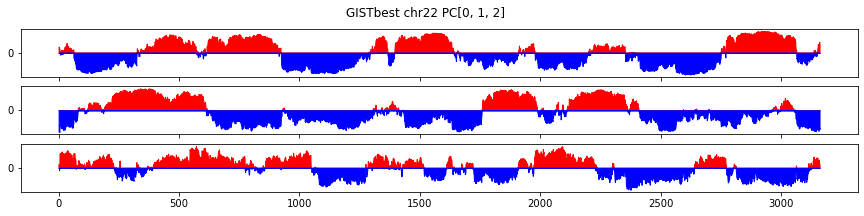

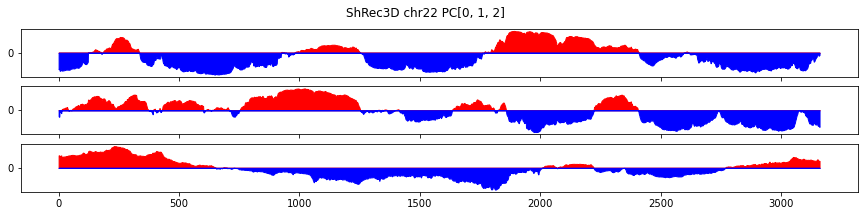

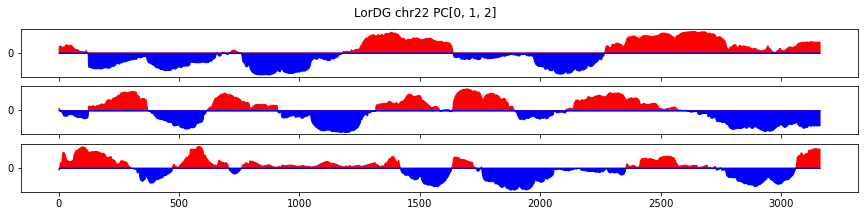

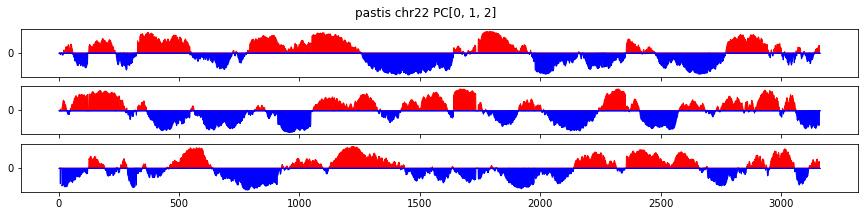

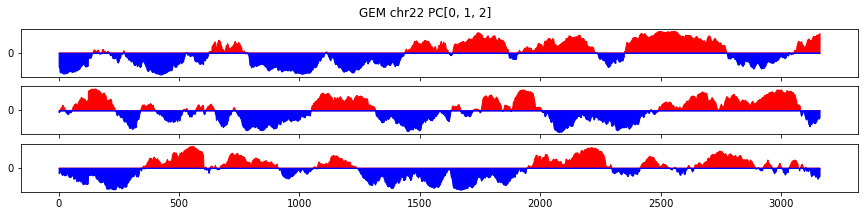

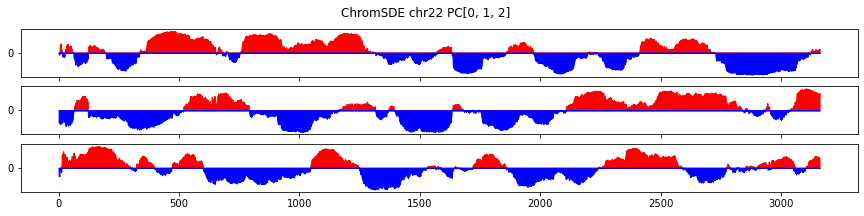

In [12]:
for chrom in chromosomes:
    for m in methods:
        if m=='GISTavg':
            key = 'GIST'
        elif m=='GISTbest':
            key = 'GIST_{}'.format(gist_best[chrom])
        else:
            key = m
        plot_pc_loci(pcs_loci[chrom][key], ipc, m, chrom, figsize=(15, 3))

## TAD level

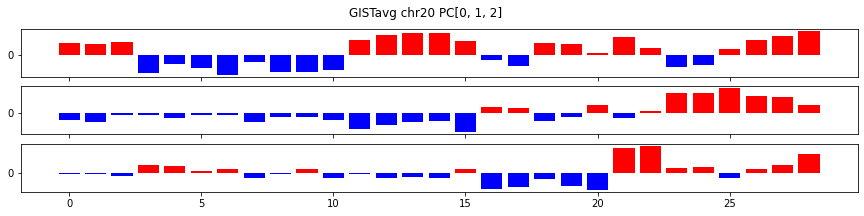

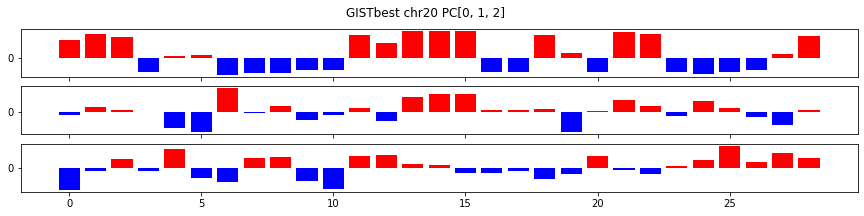

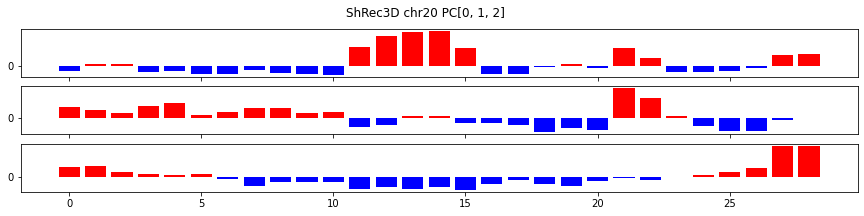

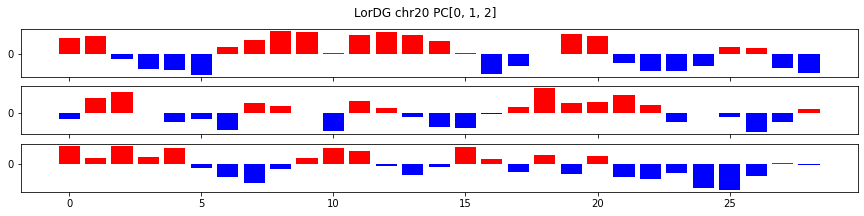

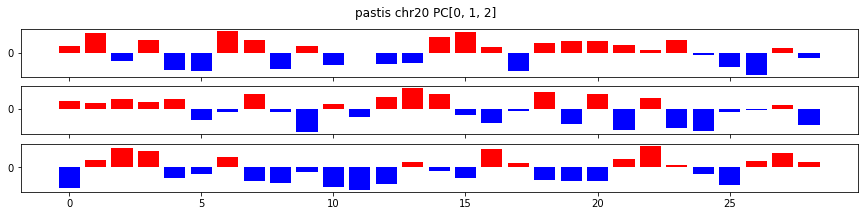

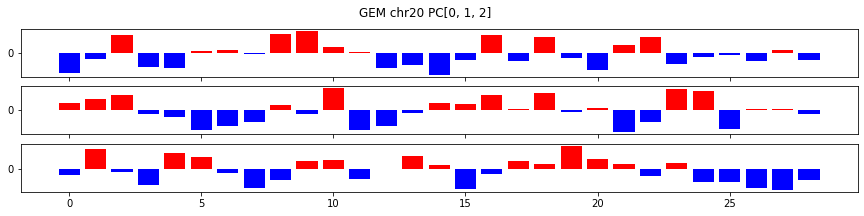

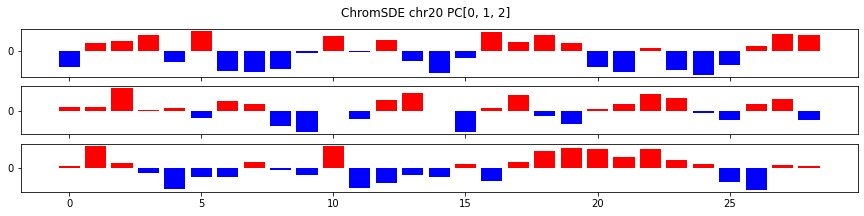

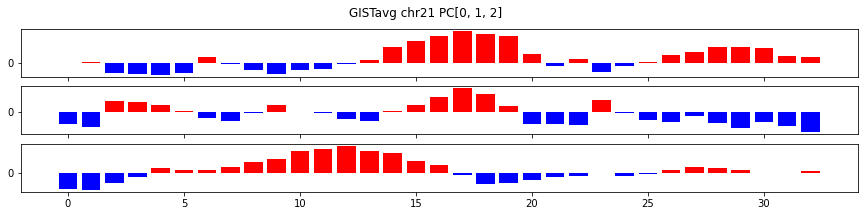

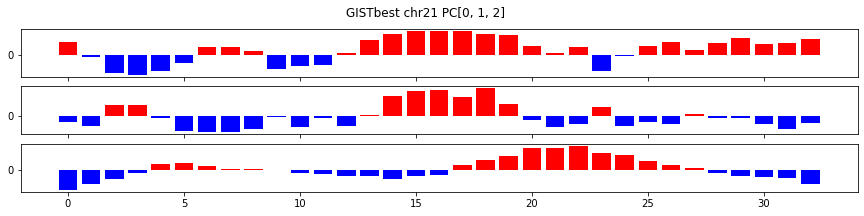

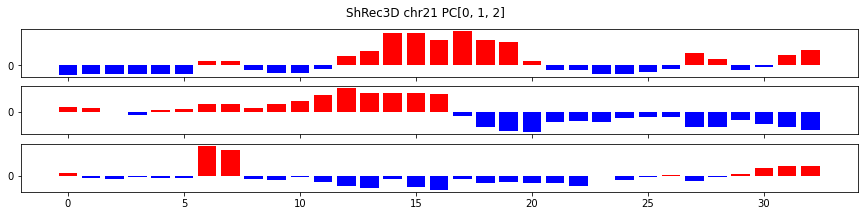

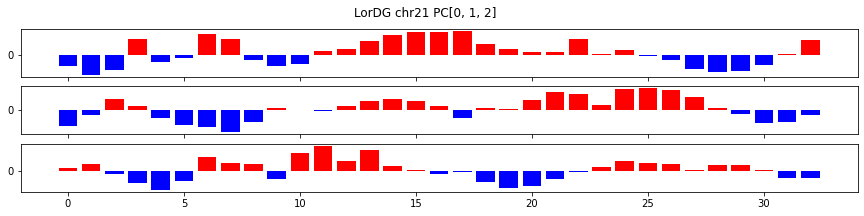

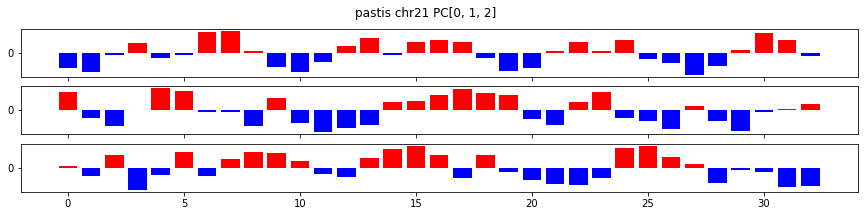

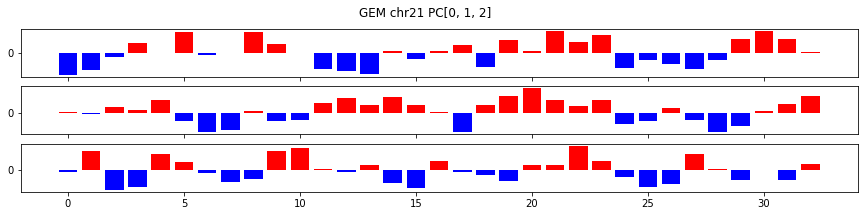

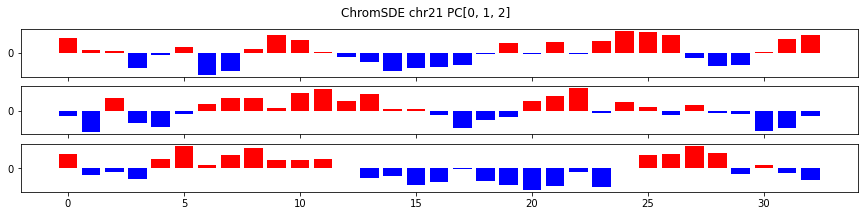

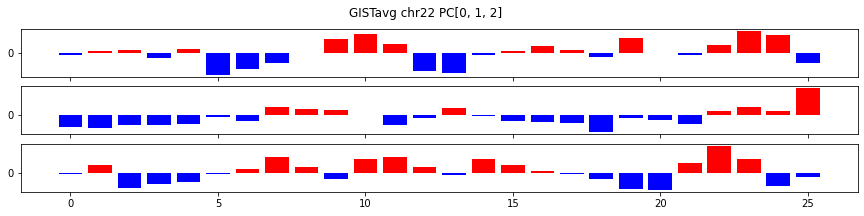

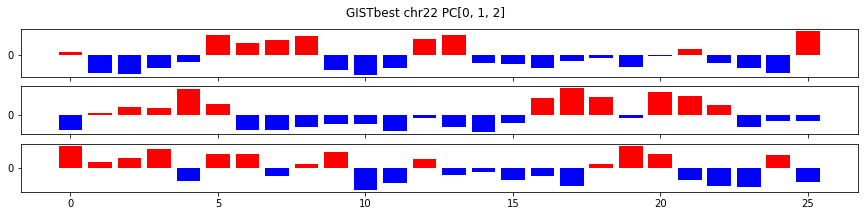

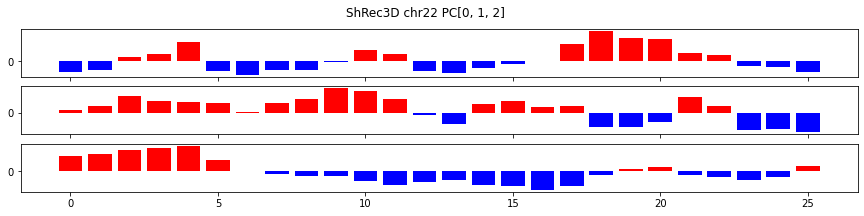

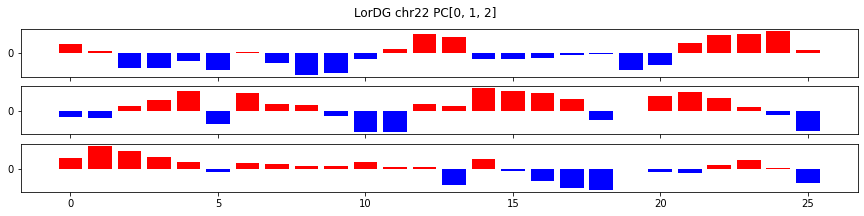

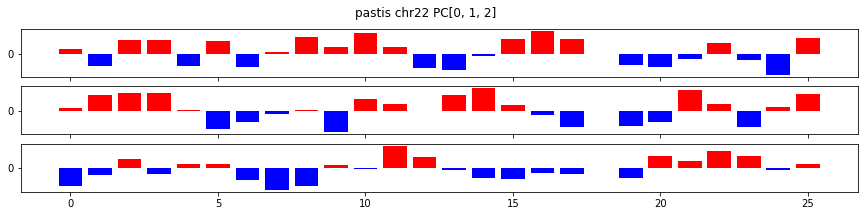

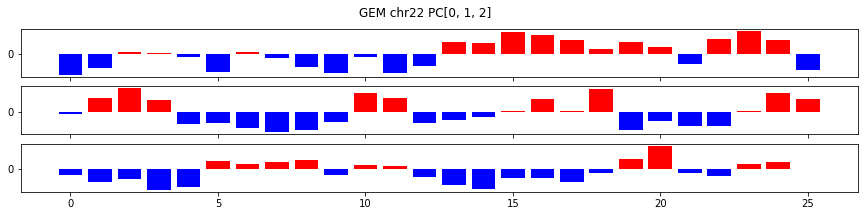

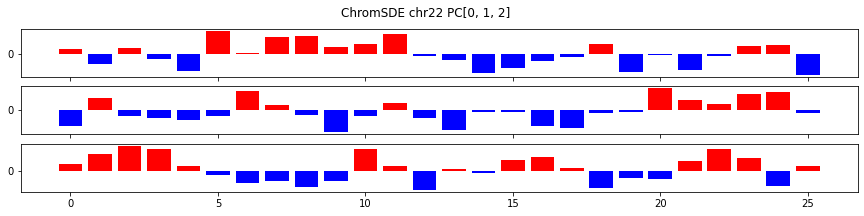

In [13]:
for chrom in chromosomes:
    for m in methods:
        if m=='GISTavg':
            key = 'GIST'
        elif m=='GISTbest':
            key = 'GIST_{}'.format(gist_best[chrom])
        else:
            key = m
        plot_pc_tad(pcs_tad[chrom][key], ipc, m, chrom, figsize=(15, 3))